Done by Wong Wen Bing, 230436M

# **Part 1: Data Preparation and Understanding** 
This section will comprise of the data understanding and data preparation conducted

In [213]:
# pip install pandas seaborn nltk matplotlib openpyxl

In [214]:
# Import 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np

In [215]:
# nltk.download('all')

Reading in data and understanding data

In [217]:
data=pd.read_excel('Data.xlsx')
data

,description,species
0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna
1,Click here for more information about the Red ...,Collared Kingfisher
2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole
3,"Search from thousands of royalty-free ""Javan M...",Javan Myna
4,521 foreground recordings and 156 background ...,Little Egret
...,...,...
737,"August 13, 2016 - HISTORICAL records show that...",Little Egret
738,File: Black-naped Oriole (Oriolus chinensis ch...,Black-naped Oriole
739,Larger than a Cattle Egret and with black leg...,Little Egret
740,22 Oct 2023 ï¿½ Dragon Snake (Javan Tubercle S...,Javan Myna


In [218]:
data.shape

(742, 2)

From the above, we can infer that there are 2 columns and a total of 742 rows

**Checking for null and duplicates**  
- there might be some empty values or duplicate values that we need to check for

In [221]:
data.isna().sum()

description    24
species         0
dtype: int64

In [222]:
dup=data.duplicated().value_counts()
print(f'''
duplicates: {dup[True]}
unique: {dup[False]}
''')


duplicates: 128
unique: 614



From the above output we can infer the below: 
- there are 24 null values
- there are 128 duplicates

**Removing null and duplicate values** 
- To ensure data integrity, null and duplicate values are remove

In [224]:
#drop null and duplicate values
data=data.dropna()
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 0 to 739
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  611 non-null    object
 1   species      611 non-null    object
dtypes: object(2)
memory usage: 14.3+ KB


#### **Data Understanding** 
- To understand the distribution of data, I set out to do some visualisations to visualise the distribution of the dataset.

Firstly, we did a distribution of the species (the target variable in the dataset.)

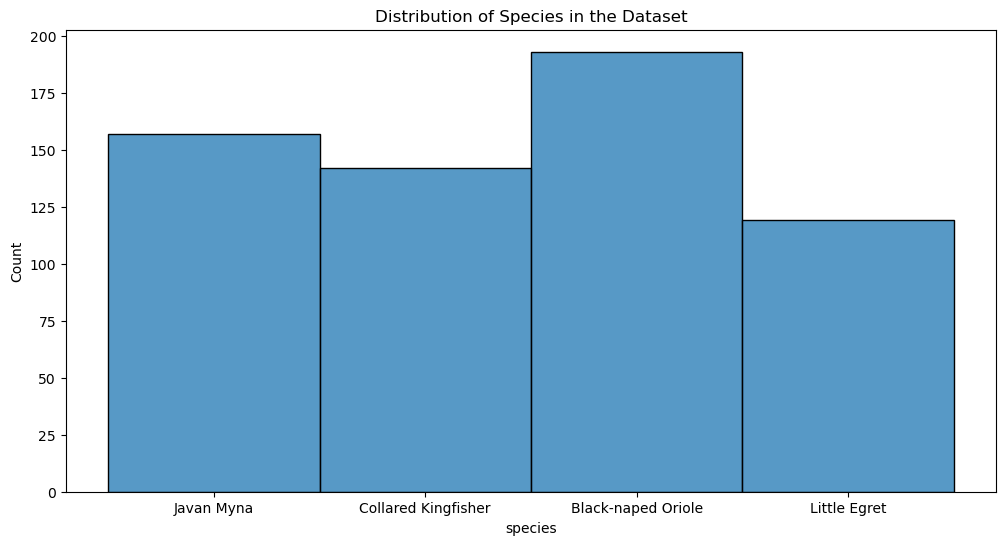

In [226]:
group=data.groupby(['species']).count()
plt.figure(figsize=(12, 6))  
sns.histplot(data['species'])
plt.title('Distribution of Species in the Dataset')
plt.show()

As we can see from above, we can realise that the Black-napled Oriole has the most records in the dataset. 
This means that there is a probability of biasedness in the dataset. 

Now, we are going to investigate the aaverage length of data in the dataset

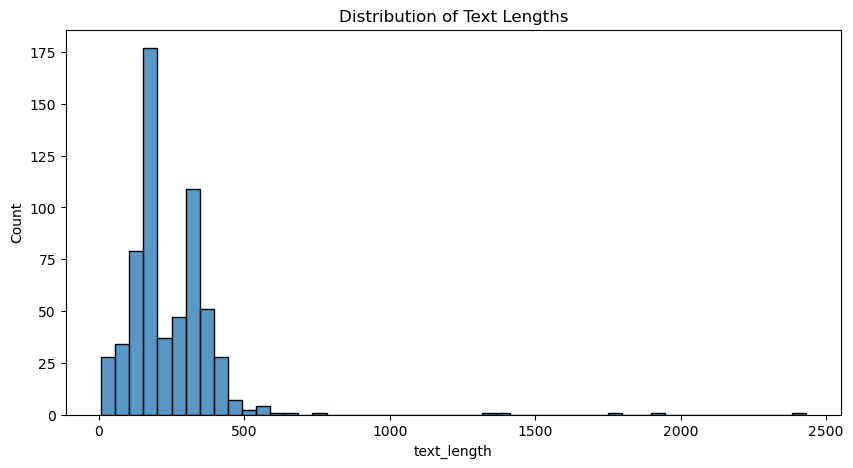

In [229]:
data['text_length'] = data['description'].apply(len)
plt.figure(figsize=(10,5))
sns.histplot(data['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.show()

## **Data Pre-Processing** 
- After examining the data, we now will conduct pre-processing of the data. The pre-processing steps include: 
1. removing of stopwords
2. removing special characters in word

In [231]:
from nltk.corpus import stopwords #stopwords
from nltk.stem.wordnet import WordNetLemmatizer #lemmatization

lemma=WordNetLemmatizer() #lemmatization
stopwordss=stopwords.words('english') #list of stopwords
# exclude=set(string.punctuation) #punctuations

def preprocess_text(text):
    stopwordss=list(stopwords.words('english'))
    text = text.lower()  # Convert to lowercase
    # text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    # text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s\s+',' ', text)
    words=word_tokenize(text)
    text=[]
    for word in words: 
        if word not in stopwordss: 
            normalized = lemma.lemmatize(word)
            text.append(normalized)
    return ' '.join(text)
data['cleaned_text']=''
data.head()

,description,species,text_length,cleaned_text
0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna,162,
1,Click here for more information about the Red ...,Collared Kingfisher,398,
2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole,349,
3,"Search from thousands of royalty-free ""Javan M...",Javan Myna,177,
4,521 foreground recordings and 156 background ...,Little Egret,112,


In [232]:
# Apply preprocessing
data['cleaned_text'] = data['description'].apply(lambda x: preprocess_text(x))
data.head()

,description,species,text_length,cleaned_text
0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna,162,jun javan myna share similarity common myna te...
1,Click here for more information about the Red ...,Collared Kingfisher,398,click information red list category criterion ...
2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole,349,black headed oriole oriolus larvatus specie bi...
3,"Search from thousands of royalty-free ""Javan M...",Javan Myna,177,search thousand royalty free javan myna stock ...
4,521 foreground recordings and 156 background ...,Little Egret,112,foreground recording background recording egre...


Examining Text Length. As a generalised rule, I want to print out the texts whcih are less than 25 words.

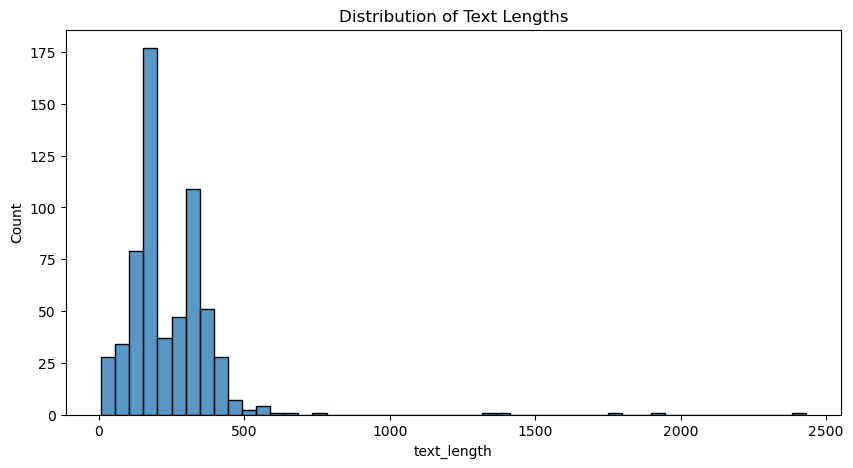

In [233]:
data['text_length'] = data['description'].apply(len)
plt.figure(figsize=(10,5))
sns.histplot(data['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.show()

In [235]:
sentences=[]
def txtlen(text): 
    if len(text) < 25: 
        sentences.append(text)

data['cleaned_text'].apply(lambda x:txtlen(x))

0      None
1      None
2      None
3      None
4      None
       ... 
735    None
736    None
737    None
738    None
739    None
Name: cleaned_text, Length: 611, dtype: object

In [236]:
print(sentences)

['published august', 'px captcha', 'published august view k', 'article', 'black naped oriole', 'common myna common', 'specie', 'published september view', 'crunchy crunchy', 'article', 'april fool joke', 'taken elmley', 'published august', 'published july view', 'specie bird', 'domain may sale', 'specie bird', 'video sound frequency']


As we can see, for those where the text length are less than 25. These are often rather irrelevant data, hence its more pertinent to remove them. And hence they are removed. 

In [238]:
def removetxt(text): 
    if len(text) < 25: 
        return np.NaN
    else: 
        return text
data['cleaned_text']=data['cleaned_text'].apply(lambda x:removetxt(x))

In [239]:
data.isnull().sum()

description      0
species          0
text_length      0
cleaned_text    18
dtype: int64

In [210]:
data.dropna(inplace=True)

In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 0 to 739
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   611 non-null    object
 1   species       611 non-null    object
 2   text_length   611 non-null    int64 
 3   cleaned_text  593 non-null    object
dtypes: int64(1), object(3)
memory usage: 23.9+ KB


Using MWE Tokenizer 
- this ensures the retention of the meaning

In [266]:
# import MWETokenizer() method from nltk 
from nltk.tokenize import MWETokenizer 

#multi-class
mw=[('black','headed'),('black','headed','oriole'), ('black-naped', 'oriole'),('black','oriole'),('javan', 'myna'), ('little', 'egret')]

# Create a reference variable for Class MWETokenizer 
tk = MWETokenizer(mw) 

def using_mwe(x):
    txt=[]
    texts = tk.tokenize(x.split(' '))
    for text in texts: 
        txt.append(text)
    return ' '.join(txt)

# Use tokenize method 
data['chunked']=data['cleaned_text'].apply(using_mwe)

AttributeError: 'float' object has no attribute 'split'

In [262]:
data.head()

,description,species,text_length,cleaned_text
0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna,162,jun javan myna share similarity common myna te...
1,Click here for more information about the Red ...,Collared Kingfisher,398,click information red list category criterion ...
2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole,349,black headed oriole oriolus larvatus specie bi...
3,"Search from thousands of royalty-free ""Javan M...",Javan Myna,177,search thousand royalty free javan myna stock ...
4,521 foreground recordings and 156 background ...,Little Egret,112,foreground recording background recording egre...


Saving MWE Tokenizer
- for future usage, in pre-processing, this can be done. 

In [111]:
import pickle
with open(f'MWE Tokenizer.pkl', 'wb') as f1: 
    pickle.dump(tk, f1)

Investigating word count

In [114]:
# pip install wordcloud

In [116]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
txt=data['chunked'].tolist() #convert dataframe columns to list
txt=' '.join(txt)
# print(txt)

<FreqDist with 3393 samples and 14478 outcomes>


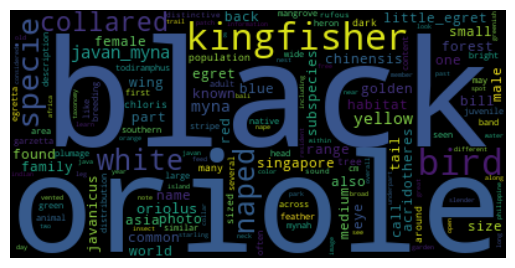

In [118]:
freq_dist=FreqDist(txt.split()) #calculate frequency of words that should be a list
print(freq_dist)
cloud=WordCloud().generate_from_frequencies(freq_dist) #generate word cloud
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [120]:
print(freq_dist.most_common())

[('black', 309), ('oriole', 302), ('kingfisher', 293), ('bird', 267), ('specie', 189), ('naped', 161), ('white', 159), ('collared', 129), ('javan_myna', 123), ('myna', 103), ('yellow', 101), ('oriolus', 90), ('common', 82), ('found', 80), ('little_egret', 77), ('singapore', 75), ('range', 73), ('bill', 68), ('also', 66), ('family', 64), ('chinensis', 63), ('eye', 60), ('blue', 56), ('name', 53), ('world', 52), ('acridotheres', 52), ('forest', 51), ('known', 49), ('subspecies', 48), ('asia', 47), ('one', 45), ('habitat', 44), ('egret', 44), ('male', 44), ('female', 44), ('javanicus', 41), ('wing', 41), ('golden', 40), ('small', 39), ('medium', 39), ('part', 39), ('red', 38), ('size', 38), ('photo', 38), ('call', 38), ('back', 37), ('tail', 37), ('population', 36), ('tree', 35), ('sized', 35), ('chloris', 34), ('many', 34), ('dark', 34), ('around', 32), ('todiramphus', 32), ('mangrove', 31), ('green', 30), ('description', 30), ('bright', 29), ('head', 29), ('wide', 29), ('area', 29), ('l

In [32]:
def remove_words(text): 
    words=['javan_myna']

In [33]:
def tagPOS(text):
    tags=[]
    wordsList = nltk.word_tokenize(text)  # Word tokenizers is used to find the words 
    tagged = nltk.pos_tag(wordsList)      #  Using a Tagger. Which is part-of-speech tagger or POS-tagger.  
    tags.append(tagged)
    return tags

data['POS Tag']=data['chunked'].apply(lambda txt: tagPOS(txt))

In [34]:
data.to_csv('230436M_cleaned_data.csv')

In [35]:
data.head(20)

,description,species,text_length,cleaned_text,chunked,POS Tag
0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna,162,jun javan myna share similarity common myna te...,jun javan_myna share similarity common myna te...,"[[(jun, NN), (javan_myna, NN), (share, NN), (s..."
1,Click here for more information about the Red ...,Collared Kingfisher,398,click information red list category criterion ...,click information red list category criterion ...,"[[(click, JJ), (information, NN), (red, JJ), (..."
2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole,349,black headed oriole oriolus larvatus specie bi...,black_headed_oriole oriolus larvatus specie bi...,"[[(black_headed_oriole, JJ), (oriolus, NN), (l..."
3,"Search from thousands of royalty-free ""Javan M...",Javan Myna,177,search thousand royalty free javan myna stock ...,search thousand royalty free javan_myna stock ...,"[[(search, NN), (thousand, CD), (royalty, NN),..."
4,521 foreground recordings and 156 background ...,Little Egret,112,foreground recording background recording egre...,foreground recording background recording egre...,"[[(foreground, NN), (recording, VBG), (backgro..."
5,The little egret (Egretta garzetta) is a smal...,Little Egret,185,little egret egretta garzetta small white hero...,little_egret egretta garzetta small white hero...,"[[(little_egret, JJ), (egretta, NN), (garzetta..."
6,Survey records slight increase in species bree...,Collared Kingfisher,62,survey record slight increase specie breeding ...,survey record slight increase specie breeding ...,"[[(survey, NN), (record, NN), (slight, VBD), (..."
7,Handbook of the Birds of the World Alive seri...,Little Egret,142,handbook bird world alive series first work ev...,handbook bird world alive series first work ev...,"[[(handbook, NN), (bird, NN), (world, NN), (al..."
8,"del Hoyo, J., A. MartÃ­nez-Vilalta, A. Motis,...",Little Egret,297,del hoyo j mart nez vilalta motis n collar g k...,del hoyo j mart nez vilalta motis n collar g k...,"[[(del, NN), (hoyo, NN), (j, NN), (mart, NN), ..."
9,Recently Viewed. Black-naped Oriole is a photo...,Black-naped Oriole,306,recently viewed black naped oriole photograph ...,recently viewed black naped oriole photograph ...,"[[(recently, RB), (viewed, VBN), (black, JJ), ..."


In [36]:
data['species'].unique()

array(['Javan Myna', 'Collared Kingfisher', 'Black-naped Oriole',
       'Little Egret'], dtype=object)

Feature Engineering

In [38]:
X = data['cleaned_text']
Y= data['species']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
X_train

508    jul rufous collared kingfisher rufous collared...
152    understanding genetic basis convergence broad ...
688    hong kong bird watching society hkbws initiate...
220    apr collared kingfisher todirhamphus chloris c...
184    content introduction little owl frankfurt germ...
                             ...                        
79     large coastal kingfisher gleaming white head t...
352    giant kingfisher trail follows jungly river re...
241    collared kingfisher feed mainly insect small r...
61     altamira oriole audubon oriole robert mcquade ...
682    khor kalba conservation reserve managed enviro...
Name: cleaned_text, Length: 427, dtype: object

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(stop_words='english', ngram_range=(1,3))
X_train_cv=cv.fit_transform(X_train)
X_test_cv=cv.transform(X_test) #make sure X_test is TRANSFORM and not fit_transform

#print dimensions and features 
print(f"""
training: {X_train_cv.toarray().shape}
test: {X_test_cv.toarray().shape}

features: {cv.get_feature_names_out()}
      """)


training: (427, 15748)
test: (184, 15748)

features: ['aa' 'aa sitesettingsid' 'ability' ... 'zoonosis' 'zoonosis singapore'
 'zoonosis singapore ban']
      


In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs')

#train
lr.fit(X_train_cv, y_train)

#apply to test
y_pred_cv=lr.predict(X_test_cv)
y_pred_cv

array(['Javan Myna', 'Javan Myna', 'Collared Kingfisher',
       'Collared Kingfisher', 'Collared Kingfisher', 'Black-naped Oriole',
       'Javan Myna', 'Collared Kingfisher', 'Javan Myna', 'Javan Myna',
       'Black-naped Oriole', 'Black-naped Oriole', 'Black-naped Oriole',
       'Little Egret', 'Black-naped Oriole', 'Little Egret',
       'Collared Kingfisher', 'Black-naped Oriole', 'Black-naped Oriole',
       'Collared Kingfisher', 'Little Egret', 'Black-naped Oriole',
       'Black-naped Oriole', 'Black-naped Oriole', 'Javan Myna',
       'Collared Kingfisher', 'Black-naped Oriole', 'Collared Kingfisher',
       'Javan Myna', 'Little Egret', 'Collared Kingfisher',
       'Black-naped Oriole', 'Collared Kingfisher', 'Collared Kingfisher',
       'Javan Myna', 'Javan Myna', 'Javan Myna', 'Collared Kingfisher',
       'Black-naped Oriole', 'Collared Kingfisher', 'Black-naped Oriole',
       'Javan Myna', 'Javan Myna', 'Black-naped Oriole', 'Javan Myna',
       'Black-naped Oriole'

In [42]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[56,  1,  1,  0],
       [ 1, 41,  1,  0],
       [ 2,  0, 45,  0],
       [ 7,  0,  2, 27]])

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       0.85      0.97      0.90        58
Collared Kingfisher       0.98      0.95      0.96        43
         Javan Myna       0.92      0.96      0.94        47
       Little Egret       1.00      0.75      0.86        36

           accuracy                           0.92       184
          macro avg       0.94      0.91      0.92       184
       weighted avg       0.93      0.92      0.92       184



In [44]:
#MAIN DIFFERENCE IN CODE
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()

#train
nb.fit(X_train_cv, y_train)

#move to X_test
y_pred_cv=nb.predict(X_test_cv)
# y_pred_cv

In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[57,  0,  1,  0],
       [ 4, 39,  0,  0],
       [ 3,  0, 44,  0],
       [ 9,  0,  2, 25]])

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       0.78      0.98      0.87        58
Collared Kingfisher       1.00      0.91      0.95        43
         Javan Myna       0.94      0.94      0.94        47
       Little Egret       1.00      0.69      0.82        36

           accuracy                           0.90       184
          macro avg       0.93      0.88      0.89       184
       weighted avg       0.91      0.90      0.90       184



In [47]:
#MAIN DIFFERENCE IN CODE
from sklearn import svm

supportvector=svm.LinearSVC()
#train
supportvector.fit(X_train_cv, y_train)

#move to X_test
y_pred_cv=supportvector.predict(X_test_cv)
# y_pred_cv

In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[56,  1,  1,  0],
       [ 1, 41,  1,  0],
       [ 0,  1, 46,  0],
       [ 5,  1,  2, 28]])

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       0.90      0.97      0.93        58
Collared Kingfisher       0.93      0.95      0.94        43
         Javan Myna       0.92      0.98      0.95        47
       Little Egret       1.00      0.78      0.88        36

           accuracy                           0.93       184
          macro avg       0.94      0.92      0.92       184
       weighted avg       0.93      0.93      0.93       184



In [50]:
testset=pd.read_excel('Data_test.xlsx')
testset.head()

,description,species
0,Looking for fun and interesting facts about a ...,Black-naped Oriole
1,Giant Panda. Grey Wolf. Canis lupus. Proboscis...,Black-naped Oriole
2,javanicus displayed during feeding such as wal...,Javan Myna
3,Black-naped Oriole: Explore more topics. Name;...,Black-naped Oriole
4,NaN,Javan Myna


In [51]:
testset.drop_duplicates(inplace=True)
testset.dropna(inplace=True)
testset['cleaned_text'] = testset['description'].apply(preprocess_text)
testset.head()

,description,species,cleaned_text
0,Looking for fun and interesting facts about a ...,Black-naped Oriole,looking fun interesting fact black naped oriol...
1,Giant Panda. Grey Wolf. Canis lupus. Proboscis...,Black-naped Oriole,giant panda grey wolf canis lupus proboscis mo...
2,javanicus displayed during feeding such as wal...,Javan Myna,javanicus displayed feeding walking jumping ho...
3,Black-naped Oriole: Explore more topics. Name;...,Black-naped Oriole,black naped oriole explore topic name descript...
5,"The Javan myna, also known as the white-vented...",Javan Myna,javan myna also known white vented myna specie...


In [52]:
test=testset['cleaned_text'].to_list()
print(test)
vector=cv.transform(test)
testset['log_reg_pred']=(lr.predict(vector))[0]

['looking fun interesting fact black naped oriole learn amazing bird discover animal tiny insect giant mammal', 'giant panda grey wolf canis lupus proboscis monkey western gorilla gorilla gorilla scarlet macaw ara macao basic fact black hooded oriole lifespan distribution habitat map lifestyle social behavior mating habit diet nutrition population size status', 'javanicus displayed feeding walking jumping hopping gleaning running short flying voicing looking around feather fluffing', 'black naped oriole explore topic name description description male overall bright yellow plumage nape wing tip black female like male', 'javan myna also known white vented myna specie myna member starling family native bali java introduced asian country far away puerto rico', 'worry typo error true common myna common sight anymore sadly common myna native asia might wonder happened go soon let introduce common myna acridotheres tristis smarko', 'black naped oriole oriolus chinensis passerine bird oriole f

In [53]:
testset.head()

,description,species,cleaned_text,log_reg_pred
0,Looking for fun and interesting facts about a ...,Black-naped Oriole,looking fun interesting fact black naped oriol...,Black-naped Oriole
1,Giant Panda. Grey Wolf. Canis lupus. Proboscis...,Black-naped Oriole,giant panda grey wolf canis lupus proboscis mo...,Black-naped Oriole
2,javanicus displayed during feeding such as wal...,Javan Myna,javanicus displayed feeding walking jumping ho...,Black-naped Oriole
3,Black-naped Oriole: Explore more topics. Name;...,Black-naped Oriole,black naped oriole explore topic name descript...,Black-naped Oriole
5,"The Javan myna, also known as the white-vented...",Javan Myna,javan myna also known white vented myna specie...,Black-naped Oriole


In [55]:
testset['naive_bayes_pred']=(nb.predict(vector))[0]

In [56]:
testset.to_excel('Tested_set.xlsx')

In [57]:
def accuracy(df): 
    # Calculate True Positives (TP): cases where prediction matches the actual species
    correct_predictions = df['species'] == df['naive_bayes_pred']
    tp = correct_predictions.sum()
    
    # Calculate total records
    total_records = len(df)
    
    # Calculate accuracy
    accuracy = tp / total_records if total_records > 0 else 0
    
    # Calculate False Positives (FP): cases where the prediction is wrong
    false_positives = (~correct_predictions).sum()
    
    return accuracy
    
accuracy(testset)

0.41025641025641024